In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-stock-and-investment/Company Stock and Investment.csv


In [116]:
df=pd.read_csv('/kaggle/input/company-stock-and-investment/Company Stock and Investment.csv',index_col=['Date'], parse_dates=['Date'])

In [117]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

In [118]:
df=pd.read_csv('/kaggle/input/company-stock-and-investment/Company Stock and Investment.csv')

In [119]:
df['Date']=pd.to_datetime(df['Date'])

In [120]:
df1.sort_values(by='Date')

,Oil Investments
Date,
2017-01-05,-0.009734
2017-01-06,0.000621
2017-01-08,-0.020315
2017-01-09,0.001270
2017-01-11,-0.000736
...,...
2017-12-05,0.000418
2017-12-06,0.006111
2017-12-07,0.009321


In [121]:
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [122]:
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [128]:
df1=df.tail(250)

In [129]:
df1

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1734,2016-11-18,0.007053,-0.012839,0.001000,0.004971
1735,2016-11-21,0.039177,0.002684,0.015174,0.026100
1736,2016-11-22,0.012426,-0.001647,0.000627,0.006833
1737,2016-11-23,-0.028084,-0.022190,-0.005098,-0.006634
1738,2016-11-25,0.000000,0.001983,0.005035,0.000320
...,...,...,...,...,...
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [130]:
df1=df1.set_index(df1['Date']).drop('Date', 1)

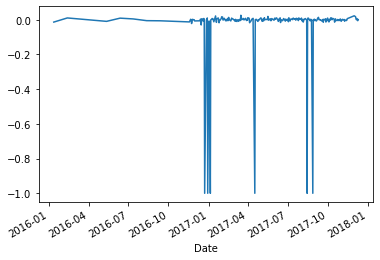

In [131]:
df1['Gold Investments'].plot()

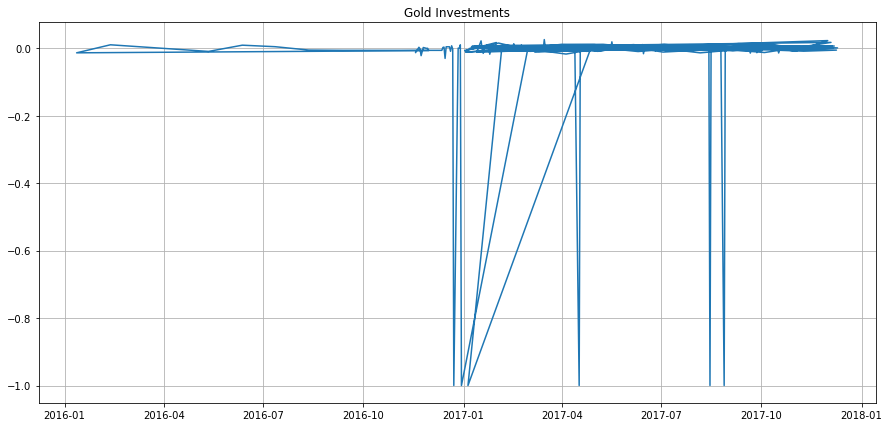

In [132]:
plt.figure(figsize=(15,7))
plt.plot(df1['Gold Investments'])
plt.title('Gold Investments')
plt.grid(True)
plt.show()

In [133]:
from statsmodels.tsa.stattools import adfuller

In [134]:
df1=df1.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1)

In [135]:
df1

,Gold Investments
Date,
2016-11-18,-0.012839
2016-11-21,0.002684
2016-11-22,-0.001647
2016-11-23,-0.022190
2016-11-25,0.001983
...,...
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944


In [136]:
print("Min:",df1.index.min())
print("Max:",df1.index.max())

Min: 2016-01-12 00:00:00
Max: 2017-12-10 00:00:00


In [137]:
df1.columns

Index(['Gold Investments'], dtype='object')

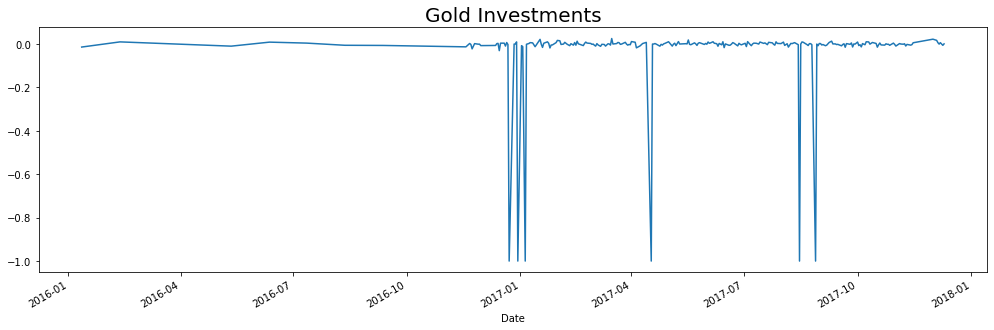

In [138]:
plt.figure(figsize=(17,5))
df1['Gold Investments'].plot()
plt.title("Gold Investments",fontsize=20)
plt.show()

In [139]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [140]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [141]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

In [142]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [143]:
df1

,Gold Investments
Date,
2016-11-18,-0.012839
2016-11-21,0.002684
2016-11-22,-0.001647
2016-11-23,-0.022190
2016-11-25,0.001983
...,...
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944


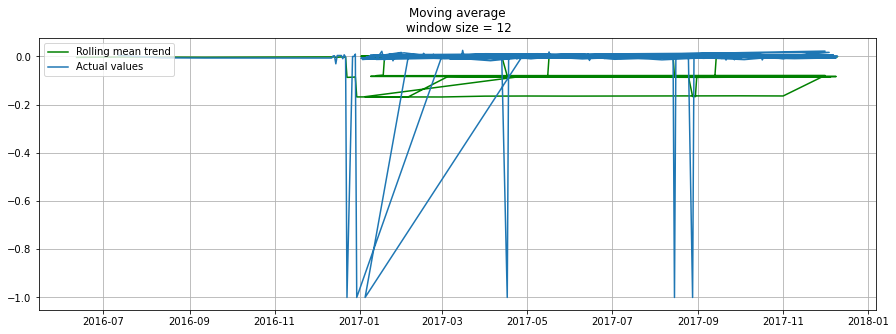

In [145]:
plotMovingAverage(df1, 12) 

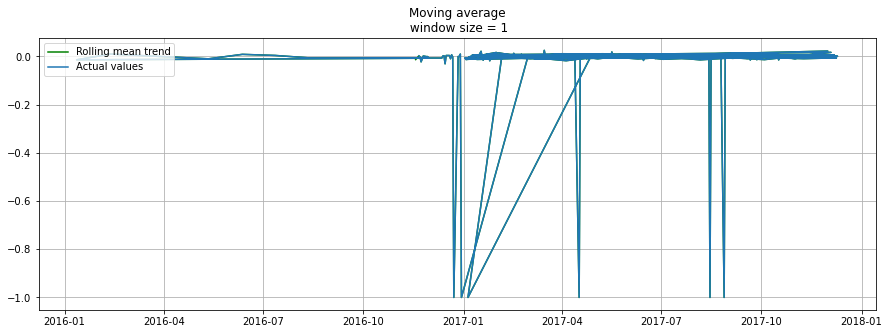

In [147]:
plotMovingAverage(df1, 1) 

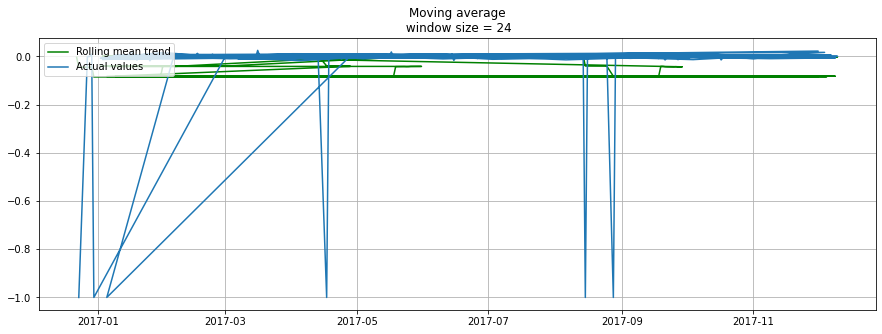

In [148]:
plotMovingAverage(df1, 24) 

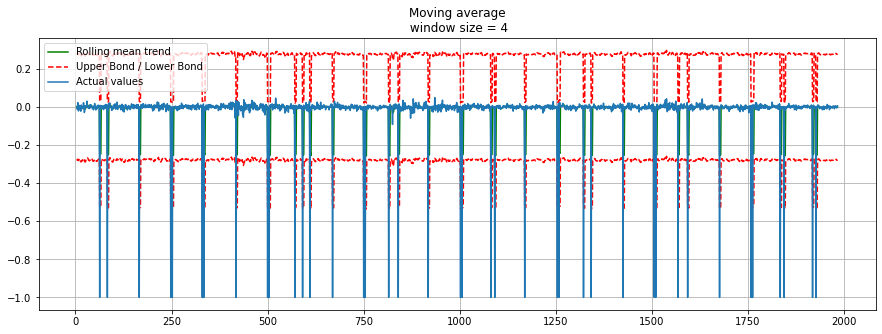

In [150]:
plotMovingAverage(df['Gold Investments'], 4, plot_intervals=True)

In [151]:
def weighted_average(series, weights):
    """
        Calculate weighter average on series
    """
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [152]:
weighted_average(df1, [0.6, 0.3, 0.1])

-0.0031567470999999993

In [153]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [154]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

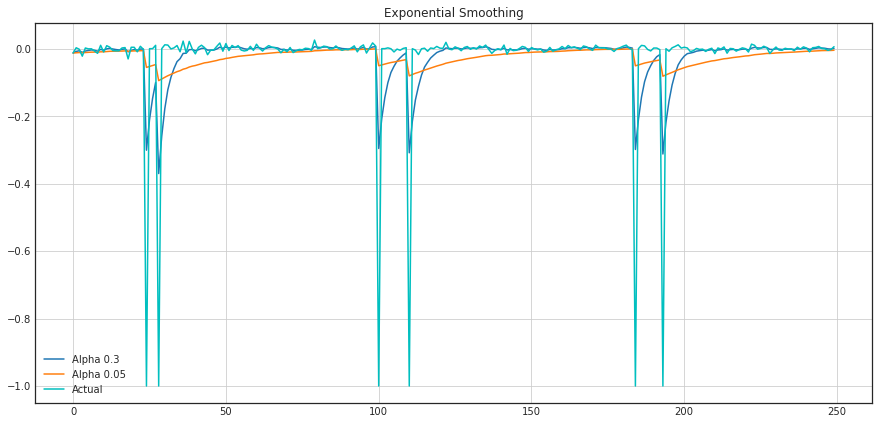

In [155]:
plotExponentialSmoothing(df1['Gold Investments'], [0.3, 0.05])

In [88]:
df1.columns

Index(['Oil Investments'], dtype='object')

In [156]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

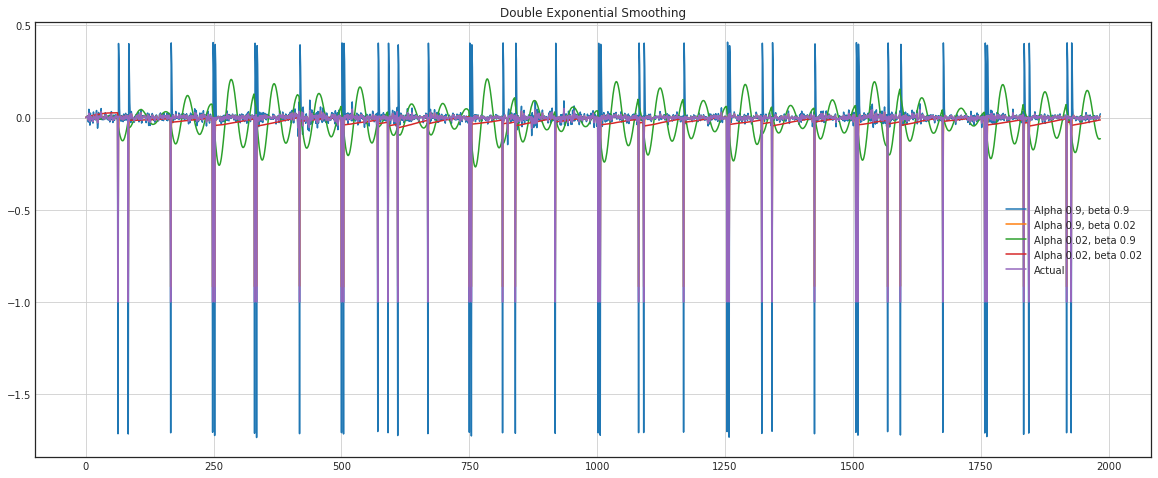

In [157]:
plotDoubleExponentialSmoothing(df['Gold Investments'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

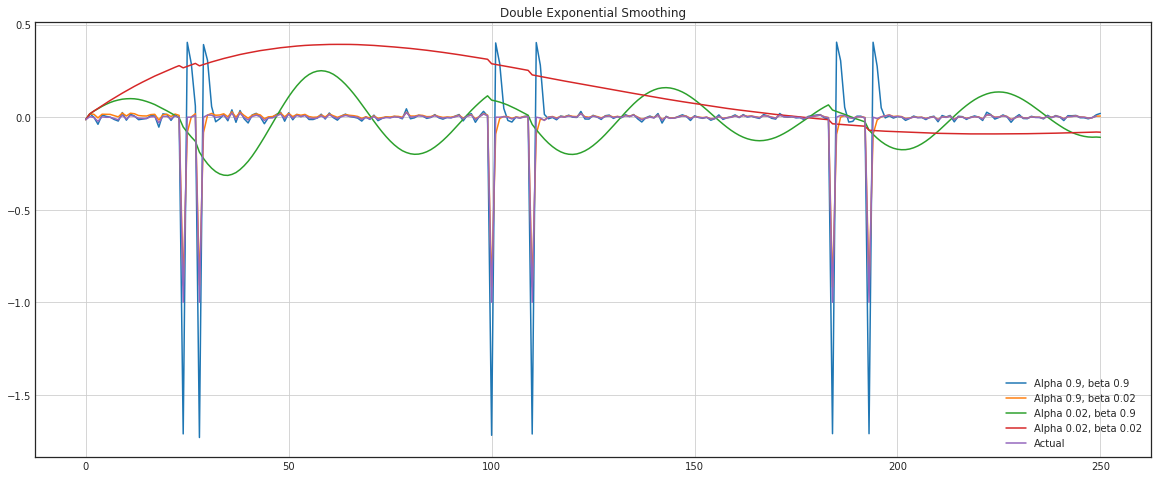

In [161]:
plotDoubleExponentialSmoothing(df1['Gold Investments'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [162]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [163]:
adfuller_test(df['Gold Investments'])

ADF Test Statistic : -15.906853851668997
p-value : 8.208405770370067e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [164]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

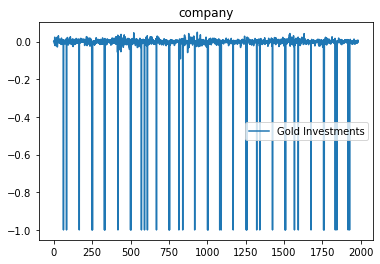

In [166]:
df[['Gold Investments']].plot()
plt.title("company")
plt.show()

Text(0.5, 1.0, 'Cumulative Returns')

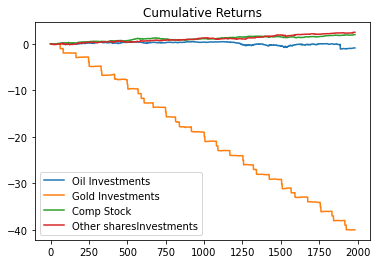

In [167]:
dr = df.cumsum()
dr.plot()
plt.title('Cumulative Returns')

Text(0.5, 1.0, 'Autocorrelation plot')

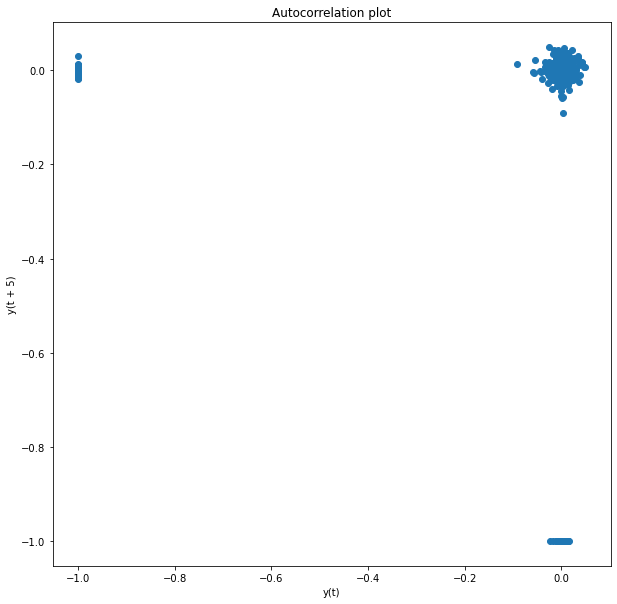

In [168]:
plt.figure(figsize=(10,10))
lag_plot(df['Gold Investments'], lag=5)
plt.title('Autocorrelation plot')

In [169]:
df1=df.drop(['Oil Investments', 'Comp Stock',
       'Other sharesInvestments'],axis=1)

In [170]:
df1

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221
...,...,...
1979,09-11-2017,0.000623
1980,10-11-2017,-0.000389
1981,13-11-2017,-0.004944
1982,14-11-2017,-0.002621


In [171]:
df['Date']

0       31-12-2009
1       04-01-2010
2       05-01-2010
3       06-01-2010
4       07-01-2010
           ...    
1979    09-11-2017
1980    10-11-2017
1981    13-11-2017
1982    14-11-2017
1983    15-11-2017
Name: Date, Length: 1984, dtype: object

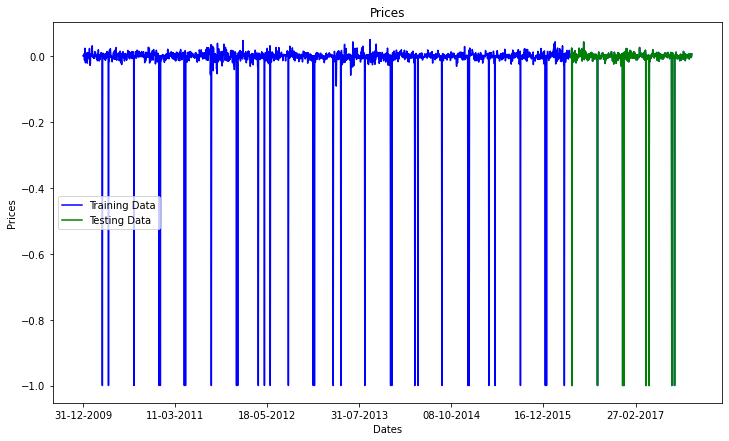

In [172]:
train_data, test_data = df1[0:int(len(df1)*0.8)], df1[int(len(df1)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df1['Gold Investments'], 'blue', label='Training Data')
plt.plot(test_data['Gold Investments'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1983, 300), df['Date'][0:1983:300])
plt.legend()



In [173]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [174]:
train_ar = train_data['Gold Investments'].values
test_ar = test_data['Gold Investments'].values


history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.023
Symmetric mean absolute percentage error: 154.963


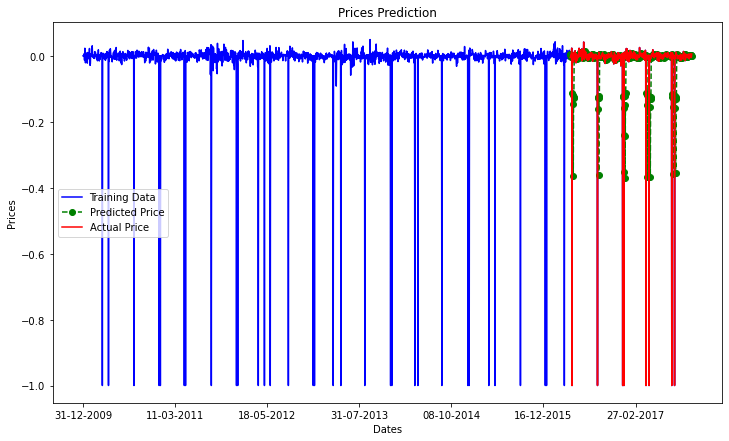

In [175]:
plt.figure(figsize=(12,7))
plt.plot(df1['Gold Investments'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Gold Investments'], color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1983, 300), df['Date'][0:1983:300])
plt.legend()

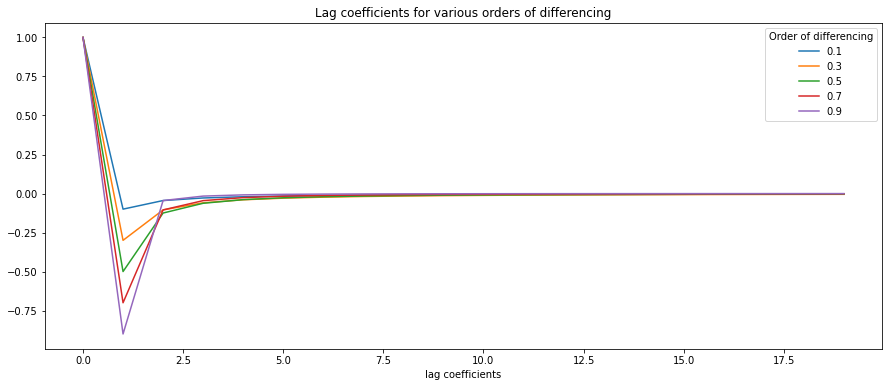

In [110]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 
plotWeights([0.1,0.9],20,5)

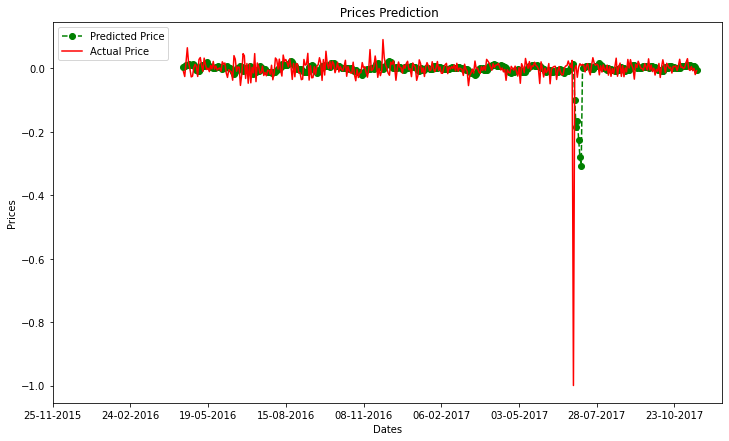

In [15]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='black', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Gold Investments'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1983, 60), df['Date'][1486:1983:60])
plt.title('  Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

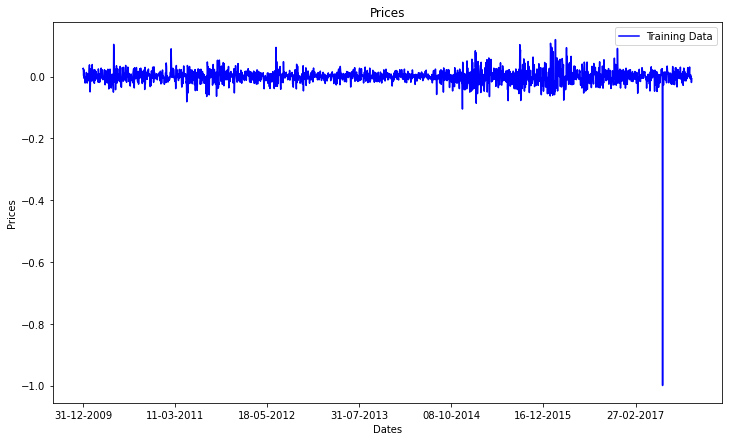

In [19]:
train_data = df1
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df1['Gold Investments'], 'blue', label='Training Data')
plt.xticks(np.arange(0,1983, 300), df['Date'][0:1983:300])
plt.legend()



In [21]:
pred_model=pd.Series(model_fit.fittedvalues, copy=True)

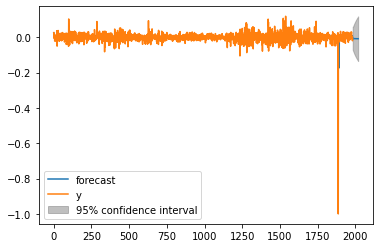

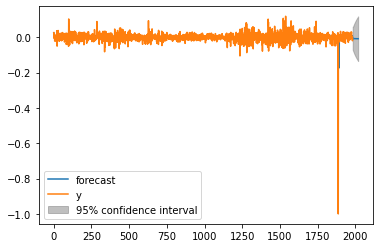

In [31]:
model_fit.plot_predict(1,2020)

In [23]:
print(pred_model.head())

0   -0.000012
1   -0.000743
2    0.016055
3   -0.002703
4    0.020943
dtype: float64


In [25]:
pred_model_cumsum =pred_model.cumsum()
print(pred_model_cumsum)

0      -0.000012
1      -0.000755
2       0.015300
3       0.012596
4       0.033540
          ...   
1978   -0.043555
1979   -0.040798
1980   -0.026551
1981   -0.023602
1982   -0.008711
Length: 1983, dtype: float64


In [32]:
pred_model_log =pd.Series(df1['Gold Investments'],index=df.index)


In [34]:
pred_model_log =pred_model_log.add(pred_model_cumsum,fill_value=0)
pred_model_log.head()

0    0.025393
1    0.025319
2    0.033298
3    0.046881
4    0.060823
dtype: float64

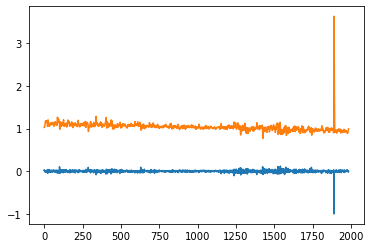

In [37]:
pred =np.exp(pred_model_log)
plt.plot(df1['Gold Investments'])
plt.plot(pred)

In [112]:
x=model_fit.forecast(steps=36)
print(x)

(array([-0.00561424, -0.00554917, -0.007491  , -0.00756851, -0.00877715,
       -0.00698527, -0.00704776, -0.00729326, -0.00758017, -0.00758703,
       -0.00757794, -0.00738276, -0.00745763, -0.00752495, -0.00756158,
       -0.00755685, -0.00755137, -0.00754837, -0.00757674, -0.00759608,
       -0.00760754, -0.00761508, -0.00762492, -0.00763739, -0.00765223,
       -0.0076647 , -0.0076761 , -0.00768754, -0.00769965, -0.00771213,
       -0.00772457, -0.00773661, -0.00774859, -0.00776068, -0.00777287,
       -0.00778508]), array([0.03344036, 0.03377762, 0.03439272, 0.03518643, 0.03626939,
       0.03770606, 0.03949802, 0.04033391, 0.04129446, 0.04231477,
       0.04337724, 0.04443742, 0.04544458, 0.04635767, 0.0472878 ,
       0.04821464, 0.0491291 , 0.05002288, 0.05089363, 0.05174606,
       0.0525907 , 0.05342341, 0.05424289, 0.05504894, 0.05584263,
       0.05662546, 0.05739841, 0.05816106, 0.05891363, 0.05965654,
       0.06039031, 0.06111537, 0.061832  , 0.06254037, 0.06324078,
    